In [61]:
import pandas as pd

In [62]:
df = pd.read_csv("flavors_of_cacao.csv")

In [63]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [64]:
df.columns = ['Company', 'SpecificBeanOrigin',
       'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating',
       'BeanType', 'BroadBeanOrigin']

In [65]:
df

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [66]:
len(df)

1795

In [67]:
len(df.Company.unique())

416

In [68]:
df.groupby(["ReviewDate"]).count()

,Company,SpecificBeanOrigin,REF,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
ReviewDate,,,,,,,,
2006,72,72,72,72,72,72,72,72
2007,77,77,77,77,77,77,77,77
2008,93,93,93,93,93,93,93,93
2009,123,123,123,123,123,123,123,123
2010,111,111,111,111,111,111,111,111
2011,165,165,165,165,165,165,164,165
2012,195,195,195,195,195,195,195,194
2013,184,184,184,184,184,184,184,184
2014,247,247,247,247,247,247,247,247


In [69]:
df["BeanType"][0]

'\xa0'

In [70]:
len(df[df.BeanType == '\xa0'])

887

In [71]:
import matplotlib.pyplot as plt

In [72]:
ratings = df.Rating.values

Text(0.5, 0, 'Rating')

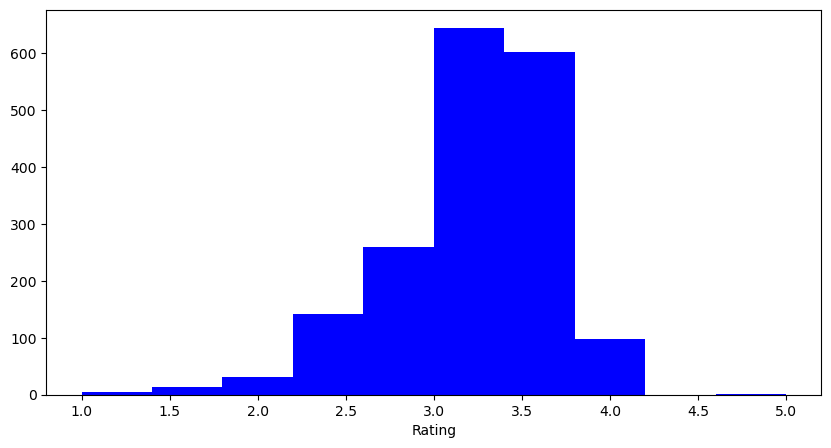

In [73]:
plt.figure(figsize = (10,5))
plt.hist(ratings, bins = 10, color= "blue")
plt.xlabel("Rating")

In [82]:
df

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [127]:
df['CocoaPercent'] =  df['CocoaPercent'].str.replace(r'\%',"").astype(int)

ValueError: invalid literal for int() with base 10: '63%'

Text(0.5, 0, 'Cocoa Percent')

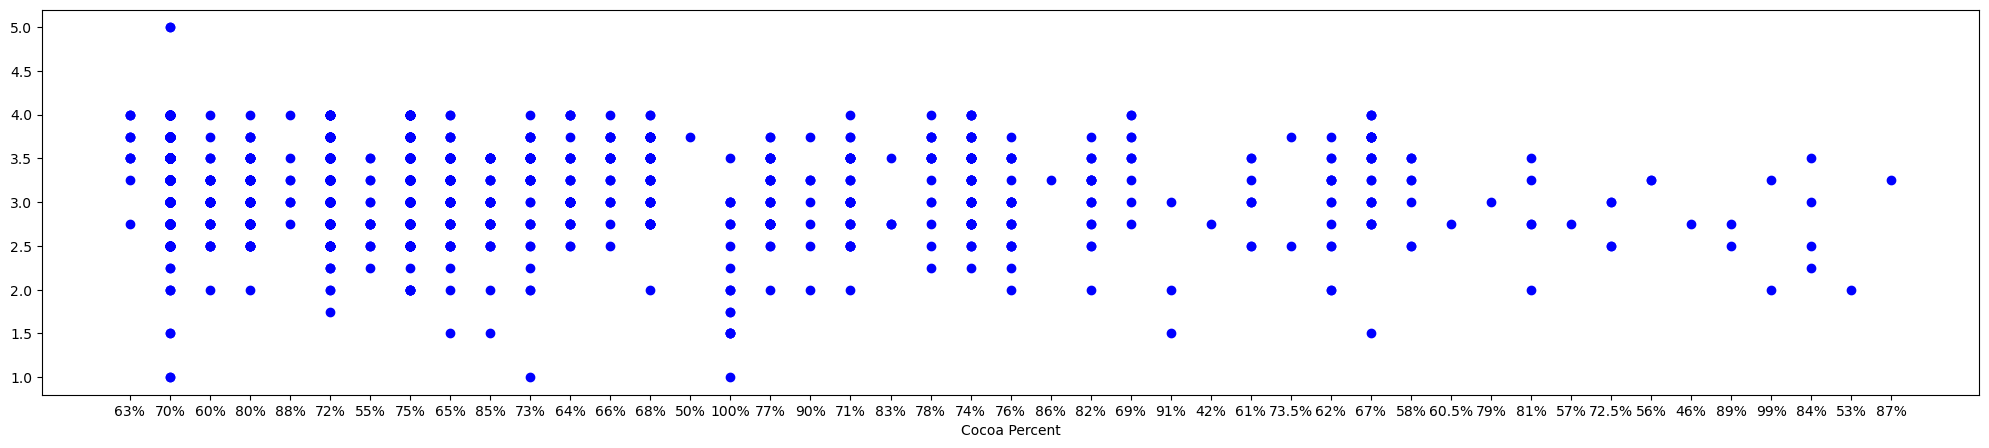

In [123]:
ratings = df.Rating.values
percent = df.CocoaPercent.values

plt.figure(figsize = (25,5))
plt.scatter(percent, ratings, color= "blue")
plt.xlabel("Cocoa Percent")

In [126]:
df.drop(df[df.CocoaPercent > 100 ].index, inplace = True)

TypeError: '>' not supported between instances of 'str' and 'int'

Text(0.5, 0, 'Cocoa Percent')

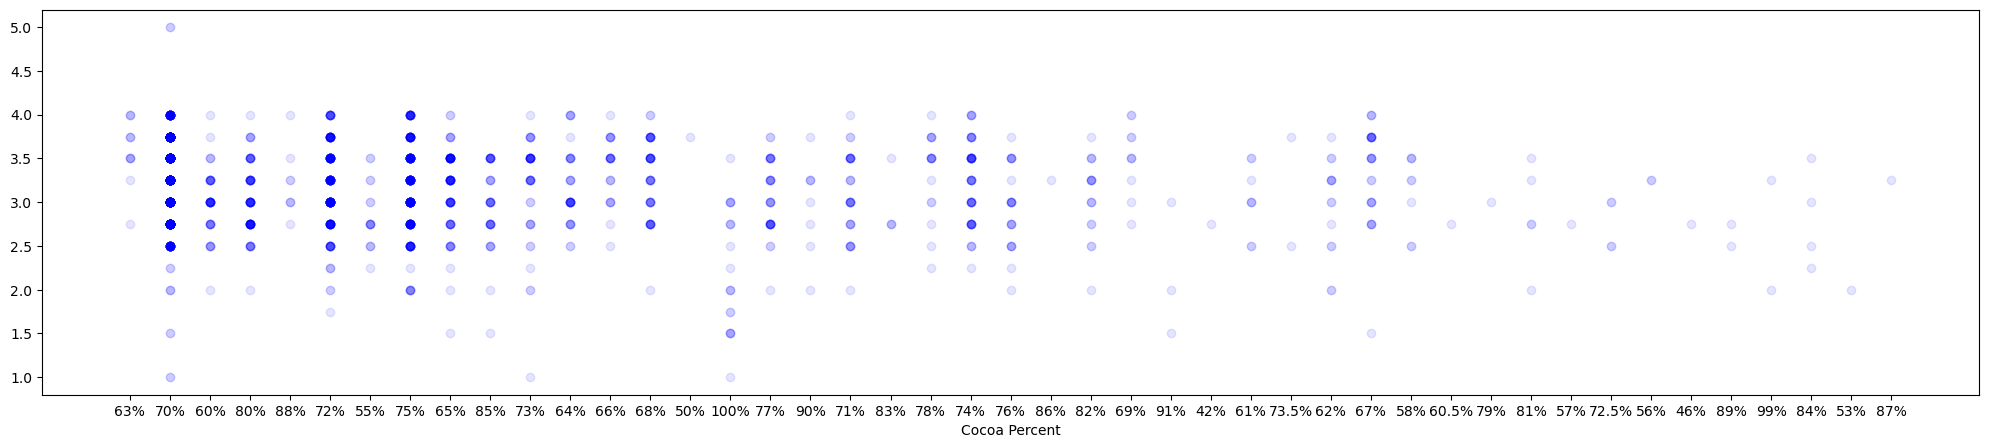

In [128]:
ratings = df.Rating.values
percent = df.CocoaPercent.values

plt.figure(figsize = (25,5))
plt.scatter(percent, ratings, color= "blue", alpha =0.1)
plt.xlabel("Cocoa Percent")

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = df.iloc[:,6:7].values

x_normalized= scaler.fit_transform(x)

In [134]:
x_normalized

array([[ 1.18023096],
       [-0.91212912],
       [-0.3890391 ],
       ...,
       [ 0.65714094],
       [ 0.13405092],
       [-0.3890391 ]])

In [135]:
df.groupby("Company")["Rating"].agg(["mean"]).sort_values(by="mean", ascending = False)

,mean
Company,
Tobago Estate (Pralus),4.000000
Heirloom Cacao Preservation (Zokoko),3.875000
Ocelot,3.875000
Amedei,3.846154
Matale,3.812500
...,...
Majani,2.000000
Love Bar,2.000000
Callebaut,1.875000


In [138]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[["Company", "CompanyLocation"]] = enc.fit_transform(df[["Company", "CompanyLocation"]])

In [139]:
df

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,0.0,Agua Grande,1876,2016,63%,18.0,3.75,,Sao Tome
1,0.0,Kpime,1676,2015,70%,18.0,2.75,,Togo
2,0.0,Atsane,1676,2015,70%,18.0,3.00,,Togo
3,0.0,Akata,1680,2015,70%,18.0,3.50,,Togo
4,0.0,Quilla,1704,2015,70%,18.0,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,410.0,Peru,647,2011,70%,3.0,3.75,,Peru
1791,410.0,Congo,749,2011,65%,3.0,3.00,Forastero,Congo
1792,410.0,Kerala State,749,2011,65%,3.0,3.50,Forastero,India
1793,410.0,Kerala State,781,2011,62%,3.0,3.25,,India
